# Когортный анализ клиентов за 2016 - 2018 год

In [1]:
#Импорт библиотек
import pandas as pd
import numpy as np
import os
import copy

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Шаг 1. Считаем данные в датафрейм. Первичное знакомство с массивом информации.

In [2]:
%%time
#Укажем путь к исходнику
path_to_data = "C:/Users/Pavel/Documents/Demo/"
#Загружаем данные
df = pd.read_csv(os.path.join(path_to_data, "СohortAnalysis_2016_2018.csv"), sep=";", parse_dates=["date"])

Wall time: 4.88 s


In [3]:
#10 первых строк датафрейма
df.head(10)

,date,promo,site,user_id,transaction_id,amount
0,2017-09-04,акция 4,сайт 3,u1009,2,200
1,2017-02-02,акция 9,сайт 1,u10017,3,400
2,2016-03-15,акция 4,сайт 3,u10033,4,400
3,2017-03-26,акция 6,сайт 5,u1007,5,600
4,2016-04-23,акция 8,сайт 3,u10045,6,900
5,2016-12-04,акция 6,сайт 2,u10028,7,1000
6,2016-09-18,акция 7,сайт 4,u10064,8,700
7,2016-06-18,акция 7,сайт 3,u10017,9,400
8,2016-11-20,акция 9,сайт 1,u10021,10,400
9,2017-04-01,акция 5,сайт 3,u10030,11,100


In [4]:
#Базовая информация по датафрейму
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   date            1048575 non-null  datetime64[ns]
 1   promo           1048575 non-null  object        
 2   site            1048575 non-null  object        
 3   user_id         1048575 non-null  object        
 4   transaction_id  1048575 non-null  int64         
 5   amount          1048575 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 48.0+ MB


In [5]:
%%time
#Отфильтруем массив так, чтобы визуально контролировать правильность дальнейших действий
df.sort_values(["user_id","date"], inplace = True)

Wall time: 9.53 s


In [6]:
df.head(10)

,date,promo,site,user_id,transaction_id,amount
112,2016-02-03,акция 6,сайт 3,u10010,114,600
1557,2016-07-06,акция 1,сайт 3,u100100,1559,200
8199,2017-05-31,акция 2,сайт 5,u100100,8201,900
999220,2018-11-16,акция 2,сайт 5,u100100,999222,700
34012,2017-01-22,акция 3,сайт 5,u10010000,34014,600
141546,2016-05-21,акция 8,сайт 5,u1001000001,141548,400
337486,2017-06-26,акция 7,сайт 2,u1001000001,337488,200
397676,2017-09-14,акция 5,сайт 2,u1001000002,397678,200
1011650,2018-03-08,акция 7,сайт 3,u10010000028,1011652,800
369468,2017-06-23,акция 5,сайт 2,u1001000005,369470,500


#### Шаг 2. Рассчитаем вспомогательную таблицу с метриками по каждому уникальному user_id (количество транзакций по клиенту, дата первой покупки, год-месяц первой покупки). Добавим рассчитанные метрики в основную таблицу.

In [7]:
%%time
#Построим вспомогательную таблицу путем группировки по полю user_id. 
df_groupby_user = df.groupby(by = ["user_id"]).agg({"date": "min", "amount": ["sum","count"]})
df_groupby_user.reset_index(inplace = True)
#Переименуем столбцы
new_columns = ["user_id","first_date_transaction", "total_amount_user","count_transaction_user"]
df_groupby_user.columns = new_columns

Wall time: 13.9 s


In [8]:
df_groupby_user.head(10)

,user_id,first_date_transaction,total_amount_user,count_transaction_user
0,u10010,2016-02-03,600,1
1,u100100,2016-07-06,1800,3
2,u10010000,2017-01-22,600,1
3,u1001000001,2016-05-21,600,2
4,u1001000002,2017-09-14,200,1
5,u10010000028,2018-03-08,800,1
6,u1001000005,2017-06-23,500,1
7,u1001000016,2017-07-24,400,1
8,u1001000019,2017-05-28,500,1
9,u100100002,2016-01-06,900,2


In [9]:
%%time
#Добавим столбец ГОД-МЕСЯЦ
df_groupby_user["first_transaction"] = df_groupby_user["first_date_transaction"].dt.strftime('%Y-%m')

Wall time: 22.3 s


In [10]:
df_groupby_user.head(10)

,user_id,first_date_transaction,total_amount_user,count_transaction_user,first_transaction
0,u10010,2016-02-03,600,1,2016-02
1,u100100,2016-07-06,1800,3,2016-07
2,u10010000,2017-01-22,600,1,2017-01
3,u1001000001,2016-05-21,600,2,2016-05
4,u1001000002,2017-09-14,200,1,2017-09
5,u10010000028,2018-03-08,800,1,2018-03
6,u1001000005,2017-06-23,500,1,2017-06
7,u1001000016,2017-07-24,400,1,2017-07
8,u1001000019,2017-05-28,500,1,2017-05
9,u100100002,2016-01-06,900,2,2016-01


In [11]:
%%time
#Объединим таблицы
df_final = pd.merge(df, df_groupby_user, how = "left", on = "user_id")

Wall time: 3.3 s


In [12]:
df_final.head(10)

,date,promo,site,user_id,transaction_id,amount,first_date_transaction,total_amount_user,count_transaction_user,first_transaction
0,2016-02-03,акция 6,сайт 3,u10010,114,600,2016-02-03,600,1,2016-02
1,2016-07-06,акция 1,сайт 3,u100100,1559,200,2016-07-06,1800,3,2016-07
2,2017-05-31,акция 2,сайт 5,u100100,8201,900,2016-07-06,1800,3,2016-07
3,2018-11-16,акция 2,сайт 5,u100100,999222,700,2016-07-06,1800,3,2016-07
4,2017-01-22,акция 3,сайт 5,u10010000,34014,600,2017-01-22,600,1,2017-01
5,2016-05-21,акция 8,сайт 5,u1001000001,141548,400,2016-05-21,600,2,2016-05
6,2017-06-26,акция 7,сайт 2,u1001000001,337488,200,2016-05-21,600,2,2016-05
7,2017-09-14,акция 5,сайт 2,u1001000002,397678,200,2017-09-14,200,1,2017-09
8,2018-03-08,акция 7,сайт 3,u10010000028,1011652,800,2018-03-08,800,1,2018-03
9,2017-06-23,акция 5,сайт 2,u1001000005,369470,500,2017-06-23,500,1,2017-06


#### Шаг 3. Рассчитаем показатель "количество дней с первой транзакции" и проведем кластеризацию данного показателя

In [13]:
%%time
# Рассчитаем показатель "количество дней с первой транзации"
df_final["delta_days"] = df_final["date"] - df_final["first_date_transaction"]
df_final["delta_days"] = df_final["delta_days"].apply(lambda x: x.days)

Wall time: 29.1 s


In [14]:
df_final.head(10)

,date,promo,site,user_id,transaction_id,amount,first_date_transaction,total_amount_user,count_transaction_user,first_transaction,delta_days
0,2016-02-03,акция 6,сайт 3,u10010,114,600,2016-02-03,600,1,2016-02,0
1,2016-07-06,акция 1,сайт 3,u100100,1559,200,2016-07-06,1800,3,2016-07,0
2,2017-05-31,акция 2,сайт 5,u100100,8201,900,2016-07-06,1800,3,2016-07,329
3,2018-11-16,акция 2,сайт 5,u100100,999222,700,2016-07-06,1800,3,2016-07,863
4,2017-01-22,акция 3,сайт 5,u10010000,34014,600,2017-01-22,600,1,2017-01,0
5,2016-05-21,акция 8,сайт 5,u1001000001,141548,400,2016-05-21,600,2,2016-05,0
6,2017-06-26,акция 7,сайт 2,u1001000001,337488,200,2016-05-21,600,2,2016-05,401
7,2017-09-14,акция 5,сайт 2,u1001000002,397678,200,2017-09-14,200,1,2017-09,0
8,2018-03-08,акция 7,сайт 3,u10010000028,1011652,800,2018-03-08,800,1,2018-03,0
9,2017-06-23,акция 5,сайт 2,u1001000005,369470,500,2017-06-23,500,1,2017-06,0


In [15]:
%%time
# Выделяем когорты. 
cut_labels_days = [x for x in range (30, 1230, 30)]
cut_bins_days = [x for x in range (0, 1230, 30)]
df_final["cohort_days"] = pd.cut(df_final["delta_days"], bins = cut_bins_days, labels=cut_labels_days, right = True)

Wall time: 113 ms


In [16]:
%%time
#Заменяем нулевые значения в категориальных данных. Просто применить fillna здесь не получиться!
df_final["cohort_days"] = df_final["cohort_days"].cat.add_categories([0])
df_final["cohort_days"].fillna(0, inplace = True)
#Уходим от категориального типа данных. Если оставить данный тип, то "0" в сводной таблице будет отображаться в самом конце, а по условию задачи 
# он должен выводиться первым.
df_final["cohort_days"] = df_final["cohort_days"].astype(int)

Wall time: 77.7 ms


In [17]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 0 to 1048574
Data columns (total 12 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   date                    1048575 non-null  datetime64[ns]
 1   promo                   1048575 non-null  object        
 2   site                    1048575 non-null  object        
 3   user_id                 1048575 non-null  object        
 4   transaction_id          1048575 non-null  int64         
 5   amount                  1048575 non-null  int64         
 6   first_date_transaction  1048575 non-null  datetime64[ns]
 7   total_amount_user       1048575 non-null  int64         
 8   count_transaction_user  1048575 non-null  int64         
 9   first_transaction       1048575 non-null  object        
 10  delta_days              1048575 non-null  int64         
 11  cohort_days             1048575 non-null  int32         
dtypes: datetime64[

In [18]:
df_final.head(10)

,date,promo,site,user_id,transaction_id,amount,first_date_transaction,total_amount_user,count_transaction_user,first_transaction,delta_days,cohort_days
0,2016-02-03,акция 6,сайт 3,u10010,114,600,2016-02-03,600,1,2016-02,0,0
1,2016-07-06,акция 1,сайт 3,u100100,1559,200,2016-07-06,1800,3,2016-07,0,0
2,2017-05-31,акция 2,сайт 5,u100100,8201,900,2016-07-06,1800,3,2016-07,329,330
3,2018-11-16,акция 2,сайт 5,u100100,999222,700,2016-07-06,1800,3,2016-07,863,870
4,2017-01-22,акция 3,сайт 5,u10010000,34014,600,2017-01-22,600,1,2017-01,0,0
5,2016-05-21,акция 8,сайт 5,u1001000001,141548,400,2016-05-21,600,2,2016-05,0,0
6,2017-06-26,акция 7,сайт 2,u1001000001,337488,200,2016-05-21,600,2,2016-05,401,420
7,2017-09-14,акция 5,сайт 2,u1001000002,397678,200,2017-09-14,200,1,2017-09,0,0
8,2018-03-08,акция 7,сайт 3,u10010000028,1011652,800,2018-03-08,800,1,2018-03,0,0
9,2017-06-23,акция 5,сайт 2,u1001000005,369470,500,2017-06-23,500,1,2017-06,0,0


In [19]:
%%time
#Построим сводную таблицу
df_pivot_table = pd.pivot_table(df_final, values=["amount"], index=["first_transaction"], columns=["cohort_days"], aggfunc=np.sum, fill_value = 0)

Wall time: 565 ms


In [20]:
#Просмотр полученного результата
df_pivot_table

amount                                                  \
cohort_days            0       30      60      90      120     150     180    
first_transaction                                                             
2016-01             6353600   77400   77100   61600   68700   65100   81200   
2016-02             5998500   64000   68800   72800   69800   71800   63800   
2016-03             6289500   67800   65800   67500   67900   70500   53700   
2016-04             6032500   72100   60200   59100   74700   61900   54200   
2016-05             6043900   65000   69000   69100   74100   87100   73200   
2016-06             5969000   66300   61600   83700   72300   68900   75800   
2016-07             5923300   77100   67000   57200   70500   66400   59300   
2016-08             5950300   64200   50200   59700   62500   67300   82600   
2016-09             5691700   63200   58100   67700   70000   66700   61300   
2016-10             5713800   63800   72000   65200   59600   71300   59600   
2016-11             5445500   52400   64200   74700   59600   62700   79700   
2016-12             5711200   69600   59200   56200   65900   67200   74700   
2017-01            12451500   92700   98500   86800   95200  122600  240100   
2017-02            11754200   86000   77900   94200   93900  243800  247600   
2017-03            12210500   85100   92100  107500  248000  255300  258100   
2017-04            11888300   73600  101800  233800  247100  226800  144300   
2017-05            11969100  101200  243600  241600  232700  146000   58100   
2017-06            43550900  813100  851600  817100  443600  267500  243700   
2017-07            46542300  873000  786900  445800  267800  277900  187500   
2017-08            44892900  823900  400100  235900  273300  178400  165700   
2017-09            31803600  313700  170000  165900  128900  101800  133900   
2017-10            17545800   75400   83500   72100   54600   55500   57200   
2017-11            16729300   67800   72100   64200   58000   64400   47500   
2017-12            17499500   69800   64000   52800   54800   52900   65500   
2018-01            15184000   48900   50400   48600   55200   60900   49300   
2018-02            13632800   43300   49800   55600   40200   47800   50900   
2018-03            15084800   57700   49000   42800   49900   53700   47000   
2018-04            14496800   52300   46100   51500   46400   45700   44800   
2018-05            14885100   60500   48800   50300   51100   53100   40700   
2018-06            14274200   45100   43000   51600   45500   46900   57900   
2018-07            14834800   55800   48800   46600   50000   54300   25900   
2018-08            14618600   38200   46900   36100   44000   21000       0   
2018-09            14110100   38000   47800   53200   24800       0       0   
2018-10            14739000   49700   45800   24000     500       0       0   
2018-11            14147200   38500   24500       0       0       0       0   
2018-12            14477300   19300       0       0       0       0       0   

                                           ...                              \
cohort_days          210     240     270   ...   840    870    900    930    
first_transaction                          ...                               
2016-01             68800   67300   78100  ...  23100  21500  25700  22600   
2016-02             60600   64300   73800  ...  22400  11700  15600  11400   
2016-03             64100   74600   72400  ...  13600  25000  22300  22500   
2016-04             58100   62700   77300  ...  15100  14100  22100  23300   
2016-05             61700   99100   84500  ...  21800  27700  24500  12100   
2016-06             76900   75000   74900  ...  20800  20100  20400  14900   
2016-07             88900   67200   77600  ...  25300  24500  16400   2300   
2016-08             77700   69300   61400  ...  15500  18300   1900      0   
2016-09             65000   66900   92600  ...  17000   2100      0      0   
201

#### Шаг 4. Посчитаем накопительный итог и отобразим данные на  графике

In [21]:
%%time
#Подсчитываем накопительный итог по столбцу amount
df_pivot_table_cumsum = df_final.groupby(by = ["first_transaction","cohort_days"]).agg({"amount": ["sum"]}).groupby(level=0).cumsum().reset_index()
df_pivot_table_cumsum.columns = ["first_transaction","cohort_days","cumsum_amount"]

Wall time: 613 ms


In [22]:
%%time
#Создадим копию таблицы для построения графика
df_pivot_table_cumsum_chart = copy.deepcopy(df_pivot_table_cumsum)
#Приведем числовые данные к миллионам рублей, чтобы упростить читаемость значений на оси Y.
df_pivot_table_cumsum_chart["cumsum_amount"]=round(df_pivot_table_cumsum_chart["cumsum_amount"]/1000000, 2)

Wall time: 34 ms


In [23]:
df_pivot_table_cumsum_chart.head(10)

,first_transaction,cohort_days,cumsum_amount
0,2016-01,0,6.35
1,2016-01,30,6.43
2,2016-01,60,6.51
3,2016-01,90,6.57
4,2016-01,120,6.64
5,2016-01,150,6.70
6,2016-01,180,6.78
7,2016-01,210,6.85
8,2016-01,240,6.92
9,2016-01,270,7.00


Wall time: 433 ms


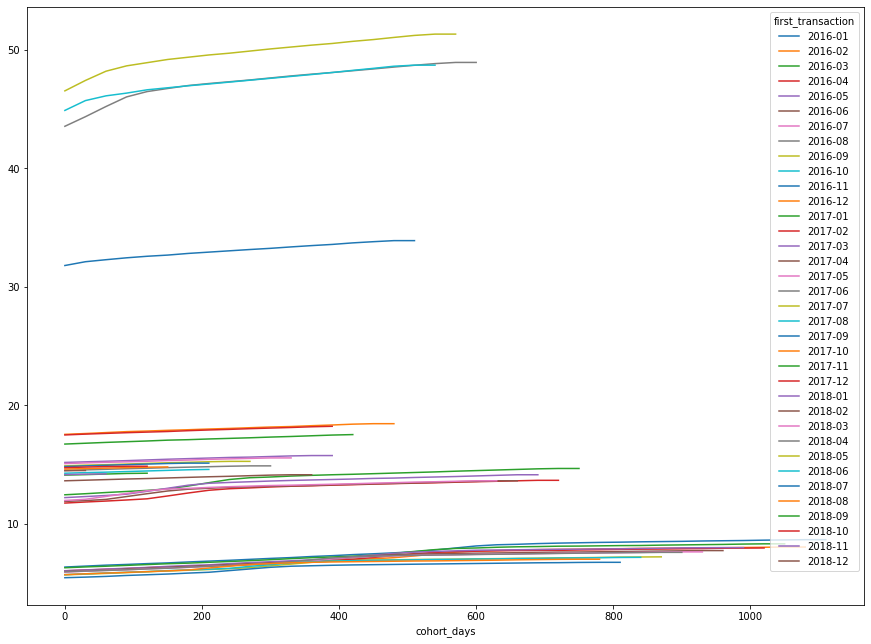

In [24]:
%%time
df_pivot_table_cumsum_chart.pivot(index="cohort_days", columns="first_transaction", values="cumsum_amount").plot(figsize = (15,11))

#### Шаг 5. Рассчитаем процентное отношение суммы первых покупок клиентов к нарастающему итогу по ряду

In [25]:
%%time
#Создадим вспомогательную таблицу с суммами первых покупок 
df_pivot_table_cumsum_first = copy.deepcopy(df_pivot_table_cumsum[df_pivot_table_cumsum["cohort_days"]==0])
df_pivot_table_cumsum_first.rename(columns={"cumsum_amount": "cumsum_amount_first"}, inplace=True)

Wall time: 15.6 ms


In [26]:
df_pivot_table_cumsum_first.head(10)

,first_transaction,cohort_days,cumsum_amount_first
0,2016-01,0,6353600
38,2016-02,0,5998500
75,2016-03,0,6289500
111,2016-04,0,6032500
146,2016-05,0,6043900
180,2016-06,0,5969000
213,2016-07,0,5923300
245,2016-08,0,5950300
276,2016-09,0,5691700
306,2016-10,0,5713800


In [27]:
%%time
#Объединим таблицы
df_pivot_table_cumsum_percent = pd.merge(df_pivot_table_cumsum, df_pivot_table_cumsum_first, how = "left", on = "first_transaction")

Wall time: 15 ms


In [28]:
df_pivot_table_cumsum_percent.head(10)

,first_transaction,cohort_days_x,cumsum_amount,cohort_days_y,cumsum_amount_first
0,2016-01,0,6353600,0,6353600
1,2016-01,30,6431000,0,6353600
2,2016-01,60,6508100,0,6353600
3,2016-01,90,6569700,0,6353600
4,2016-01,120,6638400,0,6353600
5,2016-01,150,6703500,0,6353600
6,2016-01,180,6784700,0,6353600
7,2016-01,210,6853500,0,6353600
8,2016-01,240,6920800,0,6353600
9,2016-01,270,6998900,0,6353600


In [29]:
%%time
#Расчитаем процентное отношение
df_pivot_table_cumsum_percent["%_amount"] = (df_pivot_table_cumsum_percent["cumsum_amount"]/df_pivot_table_cumsum_percent["cumsum_amount_first"]-1)*100
df_pivot_table_cumsum_percent["%_amount"] = round(df_pivot_table_cumsum_percent["%_amount"],1).apply(lambda x:"{}%".format(x))
#Удалим ненужные для будущих расчетов столбцы из датафрейма
df_pivot_table_cumsum_percent.drop(["cumsum_amount", "cumsum_amount_first","cohort_days_y"], axis='columns', inplace=True)
#Переименуем столбцы
df_pivot_table_cumsum_percent.rename(columns={"cohort_days_x": "cohort_days"}, inplace=True)

Wall time: 17 ms


In [30]:
df_pivot_table_cumsum_percent.head(10)

,first_transaction,cohort_days,%_amount
0,2016-01,0,0.0%
1,2016-01,30,1.2%
2,2016-01,60,2.4%
3,2016-01,90,3.4%
4,2016-01,120,4.5%
5,2016-01,150,5.5%
6,2016-01,180,6.8%
7,2016-01,210,7.9%
8,2016-01,240,8.9%
9,2016-01,270,10.2%


In [31]:
%%time
df_pivot_table_cumsum_percent.pivot(index="first_transaction", columns="cohort_days", values="%_amount").fillna(0)

Wall time: 79.1 ms


cohort_days,0,30,60,90,120,150,180,210,240,270,...,840,870,900,930,960,990,1020,1050,1080,1110
first_transaction,,,,,,,,,,,,,,,,,,,,,
2016-01,0.0%,1.2%,2.4%,3.4%,4.5%,5.5%,6.8%,7.9%,8.9%,10.2%,...,33.4%,33.8%,34.2%,34.5%,34.9%,35.2%,35.6%,36.0%,36.3%,36.3%
2016-02,0.0%,1.1%,2.2%,3.4%,4.6%,5.8%,6.9%,7.9%,8.9%,10.2%,...,32.1%,32.3%,32.6%,32.8%,33.0%,33.3%,33.7%,34.0%,34.0%,0
2016-03,0.0%,1.1%,2.1%,3.2%,4.3%,5.4%,6.3%,7.3%,8.5%,9.6%,...,29.9%,30.3%,30.7%,31.0%,31.3%,31.7%,32.2%,32.2%,0,0
2016-04,0.0%,1.2%,2.2%,3.2%,4.4%,5.4%,6.3%,7.3%,8.3%,9.6%,...,30.2%,30.5%,30.8%,31.2%,31.6%,31.8%,31.9%,0,0,0
2016-05,0.0%,1.1%,2.2%,3.4%,4.6%,6.0%,7.2%,8.3%,9.9%,11.3%,...,31.0%,31.4%,31.8%,32.0%,32.3%,32.3%,0,0,0,0
2016-06,0.0%,1.1%,2.1%,3.5%,4.8%,5.9%,7.2%,8.5%,9.7%,11.0%,...,28.7%,29.1%,29.4%,29.7%,29.7%,0,0,0,0,0
2016-07,0.0%,1.3%,2.4%,3.4%,4.6%,5.7%,6.7%,8.2%,9.3%,10.7%,...,28.1%,28.5%,28.8%,28.9%,0,0,0,0,0,0
2016-08,0.0%,1.1%,1.9%,2.9%,4.0%,5.1%,6.5%,7.8%,9.0%,10.0%,...,27.3%,27.6%,27.6%,0,0,0,0,0,0,0
2016-09,0.0%,1.1%,2.1%,3.3%,4.6%,5.7%,6.8%,7.9%,9.1%,10.7%,...,26.6%,26.6%,0,0,0,0,0,0,0,0


#### Шаг 6. Рассчитаем метрики промо

In [32]:
df_final.head(10)

,date,promo,site,user_id,transaction_id,amount,first_date_transaction,total_amount_user,count_transaction_user,first_transaction,delta_days,cohort_days
0,2016-02-03,акция 6,сайт 3,u10010,114,600,2016-02-03,600,1,2016-02,0,0
1,2016-07-06,акция 1,сайт 3,u100100,1559,200,2016-07-06,1800,3,2016-07,0,0
2,2017-05-31,акция 2,сайт 5,u100100,8201,900,2016-07-06,1800,3,2016-07,329,330
3,2018-11-16,акция 2,сайт 5,u100100,999222,700,2016-07-06,1800,3,2016-07,863,870
4,2017-01-22,акция 3,сайт 5,u10010000,34014,600,2017-01-22,600,1,2017-01,0,0
5,2016-05-21,акция 8,сайт 5,u1001000001,141548,400,2016-05-21,600,2,2016-05,0,0
6,2017-06-26,акция 7,сайт 2,u1001000001,337488,200,2016-05-21,600,2,2016-05,401,420
7,2017-09-14,акция 5,сайт 2,u1001000002,397678,200,2017-09-14,200,1,2017-09,0,0
8,2018-03-08,акция 7,сайт 3,u10010000028,1011652,800,2018-03-08,800,1,2018-03,0,0
9,2017-06-23,акция 5,сайт 2,u1001000005,369470,500,2017-06-23,500,1,2017-06,0,0


In [33]:
%%time
#Проведем группировку датафрейма df_final по полю promo. Рассчитываем суммарную выручку по акциям, а также количество уникальных пользователей в какой акции
df_final_group_promo = df_final.groupby(by=["promo"]).agg({"amount":"sum","user_id":"nunique"}).reset_index()
df_final_group_promo.columns = ["promo", "total_amount", "count_unique_user"]

Wall time: 2.03 s


In [34]:
df_final_group_promo.head(10)

,promo,total_amount,count_unique_user
0,акция 1,64088000,115234
1,акция 2,64132500,115218
2,акция 3,64385800,115656
3,акция 4,64066700,115227
4,акция 5,64078000,115208
5,акция 6,63895500,115311
6,акция 7,64194900,115242
7,акция 8,64086800,115212
8,акция 9,63943800,114691


In [35]:
%%time
#Рассчитаем выручку, приходящуюся на одного уникального пользователя
df_final_group_promo["amount_unique_user"] = round(df_final_group_promo["total_amount"]/df_final_group_promo["count_unique_user"],0)

Wall time: 5 ms


In [36]:
df_final_group_promo.head(10)

,promo,total_amount,count_unique_user,amount_unique_user
0,акция 1,64088000,115234,556.0
1,акция 2,64132500,115218,557.0
2,акция 3,64385800,115656,557.0
3,акция 4,64066700,115227,556.0
4,акция 5,64078000,115208,556.0
5,акция 6,63895500,115311,554.0
6,акция 7,64194900,115242,557.0
7,акция 8,64086800,115212,556.0
8,акция 9,63943800,114691,558.0


In [37]:
#Функция, позволяющая получать суммарную выручку по акции за первые 90 дней. При этом не учитывается сумма первоначальной покупки (там где cohort_days == 0)
def amount_90_days(val):
    return df_final[(df_final["promo"] ==val)&(df_final["cohort_days"].isin([30,60,90]))]["amount"].sum()

In [38]:
%%time
#Применим функцию к датафрейму
df_final_group_promo["amount_90_days"] = df_final_group_promo["promo"].apply(lambda x: amount_90_days(x))
df_final_group_promo

Wall time: 2.78 s


,promo,total_amount,count_unique_user,amount_unique_user,amount_90_days
0,акция 1,64088000,115234,556.0,1409400
1,акция 2,64132500,115218,557.0,1458200
2,акция 3,64385800,115656,557.0,1438900
3,акция 4,64066700,115227,556.0,1392500
4,акция 5,64078000,115208,556.0,1468700
5,акция 6,63895500,115311,554.0,1466700
6,акция 7,64194900,115242,557.0,1505000
7,акция 8,64086800,115212,556.0,1454200
8,акция 9,63943800,114691,558.0,1420600


#### Шаг 7. Визуализируем полученные результаты

Wall time: 137 ms


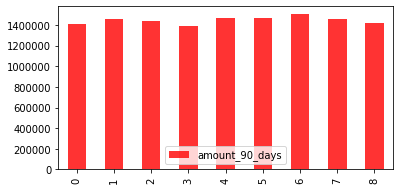

In [39]:
%%time
#Построим график по суммарной выручке за 90 дней
df_final_group_promo.loc[:,["promo","amount_90_days"]].plot.bar(color='r', alpha=0.8,figsize=(6, 3))